<a href="https://colab.research.google.com/github/sademat/llm/blob/main/notbooks/housing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's make sure Python and sklearn versions are up to date!

This project requires Python 3.7 or above. assert function checks whether Python 3.7 is present in Colab

In [ ]:
import sys

assert sys.version_info >= (3, 7)

It also requires Python library for ML Scikit-Learn ≥ 1.0.1 to be present in Colab

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# STEP 1. Get the Data

### Download the data

We will import the data stored in .tgz file online

In [ ]:
# STEP 1: Import the tools we need
from pathlib import Path        # finding files
import pandas as pd             # operations on data
import tarfile                  # unlocks compressed files
import urllib.request           # downloads from internet

# STEP 2: Create a function to get the data
def load_housing_data():

    # STEP 3: Check if we already have the file
    tarball_path = Path("datasets/housing.tgz")

    if not tarball_path.is_file():  # If file doesn't exist...

        # STEP 4: Create a folder to store it
        Path("datasets").mkdir(parents=True, exist_ok=True)

        # STEP 5: Download from GitHub
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        # ☝️ Like right-clicking "Save As..." but in code

    # STEP 6: Unzip the compressed file
    with tarfile.open(tarball_path) as housing_tarball:
        housing_tarball.extractall(path="datasets")

    # STEP 7: Read the CSV and convert to DataFrame
    return pd.read_csv(Path("datasets/housing/housing.csv"))

# STEP 8: Actually run the function and save result
housing = load_housing_data()

/tmp/ipython-input-1782301629.py:25: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="datasets")


### Look at the data structure

Before full EDA we will look at the data structure with .head(), .info() and .describe()

In [ ]:
housing.head()

# BREAKS DOWN TO:
# housing     = Our DataFrame (the whole dataset)
# .head()     = Method that shows first 5 rows


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info() # great to check missing values and data types in the dataset ---> we will refer to this in p-6 (Preparing the data for ML algorithm)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.describe() # descriptive statistics

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 2. Visualize the data to understand its structure better

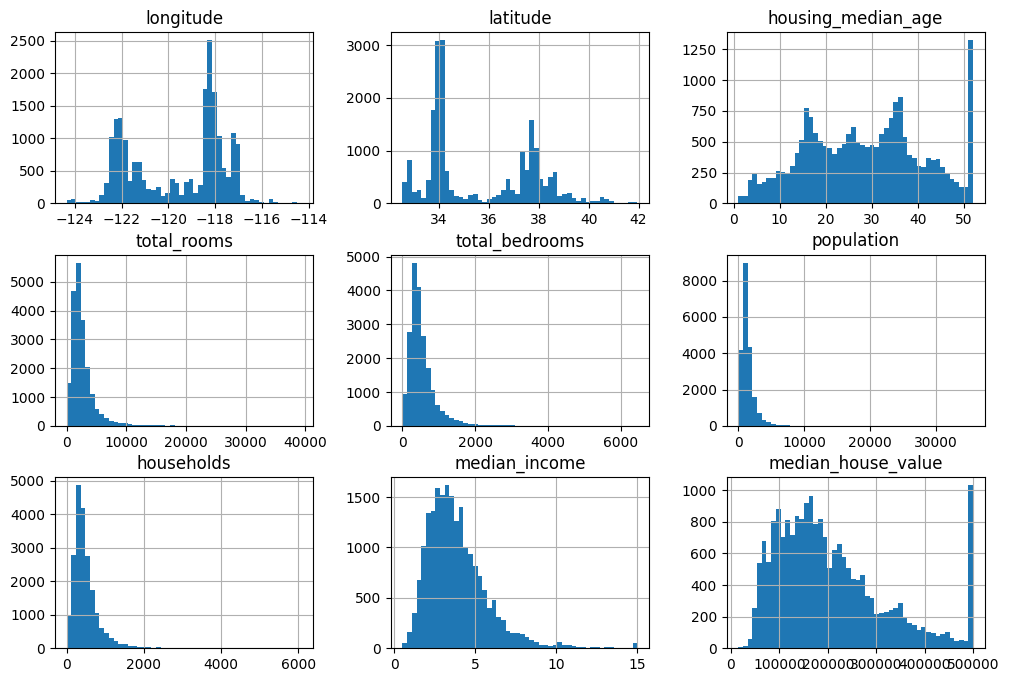

In [ ]:
import matplotlib.pyplot as plt # import Python's main plotting library

housing.hist(bins=50, figsize=(12, 8)) # create 10 separate histograms (one per column)

plt.show()

# 3. Split the data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split # import scikit-learn's standard data splitting function

# Split data: 80% training, 20% testing - this is a standard split
train_set, test_set = train_test_split(
    housing,            # The full dataset (20,640 rows)
    test_size=0.2,      # 20% goes to testing (4,128 rows)
    random_state=42     # Seed for reproducibility
)

## 4. Check for Correlations

In [ ]:
corr_matrix = housing.corr(numeric_only=True) # calculate correlation matrix for all numeric columns

# WHAT IS CORRELATION?
#   → Measures relationship between two variables
#   → Range: -1 to +1
#   → +1 = Perfect positive correlation (both increase together)
#   →  0 = No correlation (no relationship)
#   → -1 = Perfect negative correlation (one increases, other decreases)

corr_matrix["median_house_value"].sort_values(ascending=False) # shows correlations with 'median_house_value' (our target) from highest to lowest

# KEY INSIGHTS:
# ✅ median_income is the KING predictor (0.69 correlation)
# ✅ Geographic features (lat/long) show weak correlations
# ✅ Room counts less important than expected


,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


# 5.Feature Engineering

In [ ]:
# Feature Engineering: Creating derived features from raw data

# 1. Average rooms per household (larger = more spacious homes)
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]

# 2. Proportion of bedrooms to total rooms (higher = more bedroom-focused layout)
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]

# 3. Average household size (higher = more people living together)
housing["people_per_house"] = housing["population"] / housing["households"]

# Why? These ratios are more predictive than raw totals because they:
# - Normalize data across districts of different sizes
# - Capture meaningful patterns (e.g., spaciousness, crowding, layout)
# - Better correlate with house prices than absolute numbers


In [ ]:
corr_matrix = housing.corr(numeric_only=True) # correlation matrix including newly created features: rooms_per_house, bedrooms_ration, people_per_house
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_house,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
people_per_house,-0.023737
population,-0.024650
longitude,-0.045967


# 6. Prepare the data for ML algorithm

### 6.1. Handling missing values

In [ ]:
from sklearn.impute import SimpleImputer # SimpleImputer - Sklearn's tool for imputing (filling) missing values

imputer = SimpleImputer(strategy="median") # fill missing values with column's median; other options: "mean", "most_frequent", "constant"


In [ ]:
import numpy as np # library to handle numeric operations

# Step 1: Select ONLY numeric columns (median doesn't work on text!)
housing_num = housing.select_dtypes(include=[np.number])

# Define null_rows_idx before using it
null_rows_idx = housing_num.isnull().any(axis=1)

# Step 2: FIT the imputer - "Learn" the median of each numeric column
imputer.fit(housing_num)

# Step 3: Check what medians were learned
imputer.statistics_

# Step 4: Verify it matches manual calculation
housing_num.median().values

# Step 5: TRANSFORM - Apply learned medians to fill NaN values
X = imputer.transform(housing_num)

# Step 6: Check which features were processed
imputer.feature_names_in_
# Shows column names imputer was fitted on (for verification)

# Step 7: Convert back to DataFrame (restore structure for analysis)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

# Step 8: Verify imputation worked on previously null rows
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
182,-118.27,34.04,13.0,1784.0,435.0,2158.0,682.0,1.7038,118100.0,2.615836,0.203162,3.164223
327,-117.65,34.04,15.0,3393.0,435.0,2039.0,611.0,3.9336,151000.0,5.553191,0.203162,3.337152
366,-122.50,37.75,44.0,1819.0,435.0,1137.0,354.0,3.4919,271800.0,5.138418,0.203162,3.211864
477,-117.99,34.14,30.0,2346.0,435.0,1988.0,474.0,2.5625,153000.0,4.949367,0.203162,4.194093
495,-114.59,34.83,41.0,812.0,435.0,375.0,158.0,1.7083,48500.0,5.139241,0.203162,2.373418


### 6.2. Handling Outliers

In [ ]:
from sklearn.ensemble import IsolationForest # using IsolationForest for OUTLIER DETECTION (anomaly detection)

isolation_forest = IsolationForest(random_state=42)

outlier_pred = isolation_forest.fit_predict(X) # fit the model AND predict outliers in one step

outlier_pred # shows the output - an array([1, 1, 1, ..., -1, 1, 1]), where -1 are OUTLIERS


array([ 1, -1,  1, ...,  1,  1,  1])

In [ ]:
#housing = housing.iloc[outlier_pred == 1] # if decided to drop outliers
#housing_labels = housing_labels.iloc[outlier_pred == 1]

### 6.3. Handling Categorical Data

In [ ]:
# Step 1: Select the categorical column. In our case there is one categorical column
housing_cat = housing[["ocean_proximity"]]

# Step 2: View first 8 rows of the categorical column
housing_cat.head(8)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY


In [ ]:
# Using OneHotEncoder - PROPER way to encode categorical data

# ===== PART 1: Basic OneHotEncoder (returns SPARSE matrix) =====
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# OneHotEncoder - Creates binary columns (0 or 1) for each category

housing_cat_1hot

housing_cat_1hot.toarray()

# array([[0., 0., 0., 1., 0.],  # NEAR BAY (4th column = 1)
#        [0., 0., 0., 1., 0.],  # NEAR BAY (4th column = 1)
#        [1., 0., 0., 0., 0.],  # <1H OCEAN (1st column = 1)
#        ...])


# ===== PART 2: Dense output (regular array instead of sparse) =====
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# sparse_output=False - Returns regular NumPy array (easier to work with)

housing_cat_1hot
# Now returns: array([[0., 0., 0., 1., 0.], ...])  directly


# ===== PART 3: Check learned categories =====
cat_encoder.categories_
# Returns: [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'])]
# Column mapping:
# Col 0: <1H OCEAN,  Col 1: INLAND,  Col 2: ISLAND,
# Col 3: NEAR BAY,   Col 4: NEAR OCEAN


# ===== PART 4: Compare with pandas get_dummies() =====
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)
# Pandas version - Quick one-hot encoding
#    ocean_proximity_INLAND  ocean_proximity_NEAR BAY
# 0                       1                         0
# 1                       0                         1

cat_encoder.transform(df_test)
# Sklearn version on same data:
# array([[0., 1., 0., 0., 0.],  # INLAND (column 1)
#        [0., 0., 0., 1., 0.]]) # NEAR BAY (column 3)


# ===== PART 5: Handling UNKNOWN categories =====
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
# "<2H OCEAN" - NEW category not seen during training!

pd.get_dummies(df_test_unknown)
# Pandas just creates a new column (dangerous in production!)
#    ocean_proximity_<2H OCEAN  ocean_proximity_ISLAND
# 0                          1                       0
# 1                          0                       1

# Sklearn WITHOUT handling unknowns - would ERROR!
# cat_encoder.transform(df_test_unknown)  # ValueError!

# SOLUTION: Tell encoder to ignore unknowns
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)
# array([[0., 0., 0., 0., 0.],  # <2H OCEAN -> all zeros (ignored)
#        [0., 0., 1., 0., 0.]]) # ISLAND -> column 2 = 1 ✓
# Unknown categories become all zeros (safer for production!)


# ===== PART 6: Get feature names =====
cat_encoder.feature_names_in_
# Returns: array(['ocean_proximity'], dtype=object)
# The original input column name

cat_encoder.get_feature_names_out()
# Returns: array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
#                 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
#                 'ocean_proximity_NEAR OCEAN'], dtype=object)
# Generated column names for the one-hot encoded features


# ===== PART 7: Create a nice DataFrame output =====
df_output = pd.DataFrame(
    cat_encoder.transform(df_test_unknown),
    columns=cat_encoder.get_feature_names_out(),
    index=df_test_unknown.index
)

df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


### 6.4. Feature Scaling. Percentiles

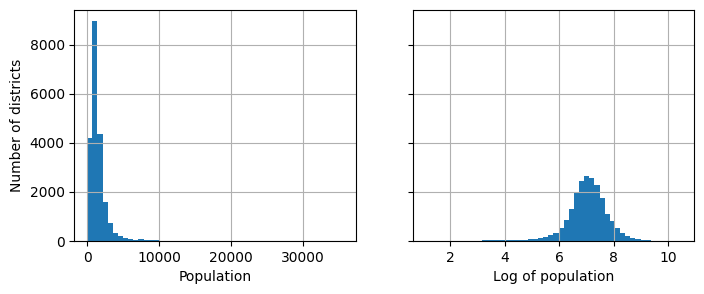

In [ ]:
# FEATURE SCALING - Making features comparable in magnitude

# ===== PART 1: MinMaxScaler (Range Scaling) =====
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
# MinMaxScaler - Squashes all values into a specified range
# feature_range=(-1, 1) - Scale to [-1, 1] instead of default [0, 1]
# Formula: X_scaled = (X - X_min) / (X_max - X_min) * (max - min) + min

housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
# fit() - Learns min and max from training data
# transform() - Applies: (value - min) / (max - min) * 2 - 1
# Result: All features now between -1 and 1

# ⚠️ Sensitive to OUTLIERS! One extreme value affects entire scale


# ===== PART 2: StandardScaler (Z-score Normalization) =====
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
# StandardScaler - Centers data around 0 with standard deviation of 1
# Formula: X_scaled = (X - mean) / std_deviation
# Result: Mean=0, StdDev=1 (standard normal distribution shape)

housing_num_std_scaled = std_scaler.fit_transform(housing_num)
# fit() - Learns mean and std from training data
# transform() - Applies: (value - mean) / std


# ===== PART 3: Log Transform (Handling Skewed Distributions) =====
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
# Create 2 side-by-side plots with shared y-axis

# LEFT PLOT: Original population (heavily right-skewed)
housing["population"].hist(ax=axs[0], bins=50)
# Most districts have LOW population (0-2000)
# Few districts have VERY HIGH population (outliers at 30,000+)
# Long right tail → skewed distribution

# RIGHT PLOT: Log-transformed population (more normal)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
# np.log() compresses large values more than small values
# 10 → 2.3,  100 → 4.6,  1000 → 6.9,  10000 → 9.2
# Result: More bell-shaped (closer to normal distribution)

axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.show()

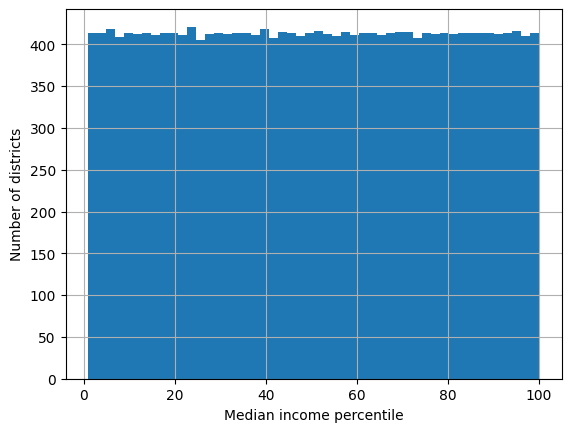

In [ ]:
# DISCRETIZATION (Binning) - Converting continuous values to categories

# ===== PART 1: Calculate percentile boundaries =====
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
# Creates 99 boundary values at 1st, 2nd, 3rd, ..., 99th percentiles

# ===== PART 2: Bin continuous values into percentile groups =====
flattened_median_income = pd.cut(
    housing["median_income"],
    bins=[-np.inf] + percentiles + [np.inf],
    labels=range(1, 100 + 1)
)
# pd.cut() - Divides continuous data into discrete bins
#
# bins parameter creates 100 bins:
# [-∞, p1], [p1, p2], [p2, p3], ..., [p99, ∞]
# • -np.inf: Captures all values below 1st percentile
# • percentiles: The 99 boundary values
# • np.inf: Captures all values above 99th percentile
#
# labels parameter: Assigns 1, 2, 3, ..., 100 to each bin
#
# Result: Each district gets a percentile rank (1-100)


# ===== PART 3: Visualize the flattened distribution =====
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()
#
# This histogram shows UNIFORM distribution (flat bars)
# Each percentile bin has roughly THE SAME number of districts (~206 each)

# 7. Linear Regression

### 7.1. Run the model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare data for Linear Regression: separate features and target, then define preprocessing steps.
# Numeric features are imputed and scaled, while categorical features are one-hot encoded.
# Finally, a Linear Regression model is built and fitted using this combined preprocessing pipeline.

housing_labels = housing["median_house_value"].copy()
housing_data = housing.drop("median_house_value", axis=1)

num_cols = housing_data.select_dtypes(include=[np.number]).columns
cat_cols = housing_data.select_dtypes(include=[object]).columns

num_pipeline = make_pipeline(imputer, StandardScaler())
cat_pipeline = make_pipeline(cat_encoder)

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols),
], remainder='passthrough')

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing_data, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_house', 'bedrooms_ratio', 'people_per_house'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('linearregression', LinearRegression())])

### 7.2. Evaluate the model

In [ ]:
# Calculate Root Mean Squared Error (RMSE) for the Linear Regression model.
# Includes a compatibility check for `root_mean_squared_error` across scikit-learn versions.

try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error
    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False)

housing_predictions = lin_reg.predict(housing_data)
lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

67884.30647749316

In [ ]:
# The RMSE of 67884.3 for the Linear Regression model indicates the average prediction error on the training data.
# This is a reasonable starting point, suggesting the model is not perfectly memorizing the data (like the Decision Tree).
# Further evaluation on a separate test set will be crucial to understand its true performance on unseen data.

In [ ]:
# Make predictions on the test set

# First, apply the same feature engineering to the test_set
test_set_processed = test_set.copy()
test_set_processed["rooms_per_house"] = test_set_processed["total_rooms"] / test_set_processed["households"]
test_set_processed["bedrooms_ratio"] = test_set_processed["total_bedrooms"] / test_set_processed["total_rooms"]
test_set_processed["people_per_house"] = test_set_processed["population"] / test_set_processed["households"]

test_set_predictions = lin_reg.predict(test_set_processed.drop("median_house_value", axis=1))

# Get the true labels for the test set
test_set_labels = test_set["median_house_value"]

# Calculate RMSE on the test set
lin_rmse_test = root_mean_squared_error(test_set_labels, test_set_predictions)

lin_rmse_test

68649.37954593814

In [ ]:
# Let's evaluate the Linear Regression model's performance based on both the training and test set RMSE:

# RMSE on Training Set: 67,884.31
# RMSE on Test Set: 68,649.38

# Generalization: The RMSE on the test set (68,649.38) is very close to the RMSE on the training set (67,884.31). This is a positive indicator, as it suggests that the Linear Regression model is generalizing well and is not significantly overfitting the training data. The model is performing consistently on both seen and unseen data.
# Absolute Error: While the generalization is good, the absolute RMSE value of around $68,649 is still quite high. Considering that the `median_house_value` ranges from $$68,649 is still quite high. Considering that the `median_house_value` ranges from $14,999 to $500,001 (as seen in `housing.describe()`), an average error of nearly $$500,001 (as seen in `housing.describe()`), an average error of nearly $69,000 might be considered substantial for practical applications.
# Conclusion: The Linear Regression model provides a solid baseline with good generalization properties, meaning it's not just memorizing the training data. However, there's significant room for improvement in terms of reducing the prediction error. To achieve better accuracy, you might consider:

# More advanced models: Exploring models like Random Forests or Gradient Boosting.
# Feature Engineering: Creating more predictive features or transforming existing ones (e.g., polynomial features).
# Hyperparameter Tuning: Optimizing the Linear Regression model itself, though Linear Regression has fewer hyperparameters than other models.

# 8. Decision Tree

### 8.1. Run the model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a pipeline with preprocessing and DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))

# Fit the Decision Tree model
tree_reg.fit(housing_data, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_house', 'bedrooms_ratio', 'people_per_house'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

### 8.2. Evaluate the model

In [ ]:
tree_predictions = tree_reg.predict(housing_data) # Generate predictions using the trained Decision Tree model
tree_rmse = root_mean_squared_error(housing_labels, tree_predictions)  # Calculate RMSE
tree_rmse  # Display the RMSE value

0.0

In [ ]:
# The RMSE of 0.0 for the Decision Tree Regressor on the training data confirms it has perfectly fit the training examples.
# This is a classic sign of overfitting, meaning the model has memorized the training data rather than generalizing patterns.
# Consequently, this model is highly likely to perform poorly on unseen data.
# To mitigate overfitting, techniques like evaluating on a test set and tuning hyperparameters (e.g., max_depth) are necessary.

# 9. Random Forest

### 9.1. Run the Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a pipeline with preprocessing and RandomForestRegressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

# Fit the Random Forest model
forest_reg.fit(housing_data, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_house', 'bedrooms_ratio', 'people_per_house'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

### 9.2. Evaluate the Model

In [ ]:
forest_predictions = forest_reg.predict(housing_data) # Generate predictions using the trained Random Forest model
forest_rmse = root_mean_squared_error(housing_labels, forest_predictions) # Calculate RMSE
forest_rmse # Display the RMSE value

18327.907034091062

In [ ]:
# Apply the same feature engineering to the test set as was done for the training data.
test_set_processed_rf = test_set.copy()
test_set_processed_rf["rooms_per_house"] = test_set_processed_rf["total_rooms"] / test_set_processed_rf["households"]
test_set_processed_rf["bedrooms_ratio"] = test_set_processed_rf["total_bedrooms"] / test_set_processed_rf["total_rooms"]
test_set_processed_rf["people_per_house"] = test_set_processed_rf["population"] / test_set_processed_rf["households"]

# Make predictions on the processed test set using the trained Random Forest model.
forest_test_predictions = forest_reg.predict(test_set_processed_rf.drop("median_house_value", axis=1))

# Get the true labels for the test set.
forest_test_labels = test_set["median_house_value"]

# Calculate the Root Mean Squared Error (RMSE) on the test set.
forest_rmse_test = root_mean_squared_error(forest_test_labels, forest_test_predictions)

forest_rmse_test

18663.559280305966

In [ ]:
# Random Forest Training RMSE: 18,327.91
# Random Forest Test RMSE: 18,663.56
# Linear Regression Test RMSE: 68,649.38
# The test RMSE for Random Forest is very close to its training RMSE, which indicates that the model is generalizing extremely well to unseen data and is not overfitting.
# Furthermore, a test RMSE of 18,663.56 is significantly lower than the Linear Regression model's test RMSE of 68,649.38, demonstrating that the Random Forest model is much more accurate in predicting median_house_value.

#This confirms that Random Forest is a powerful model for this dataset, offering a strong balance between predictive accuracy and generalization ability compared to the simpler Linear Regression and the overfitting Decision Tree.

=======================================================================
# GRADIO
=======================================================================

In [ ]:
# ============================================
# SAVE MODEL AND PREPROCESSING PIPELINE
# ============================================

import joblib
import pickle

# 1. Save the trained model
# WHAT: Saves your Random Forest model to a file
# WHY: So we can load it later in Gradio without retraining
joblib.dump(forest_reg, 'forest_model.pkl')
print("✅ Model saved as 'forest_model.pkl'")

# 2. Save the preprocessing pipeline
# WHAT: Saves your StandardScaler + OneHotEncoder pipeline
# WHY: New data MUST use the same transformation (same mean/std, same categories)
joblib.dump(preprocessing, 'preprocessor.pkl')
print("✅ Preprocessor saved as 'preprocessor.pkl'")

# 3. Verify the files work
# WHAT: Test loading to make sure files aren't corrupted
# WHY: Better to catch errors now than in production
loaded_model = joblib.load('forest_model.pkl')
loaded_preprocessor = joblib.load('preprocessor.pkl') # Still loaded, but not used in the next line to avoid double preprocessing.

# Quick test
# We drop 'median_house_value' from the raw data because 'loaded_model' (which is 'forest_reg')
# is a pipeline that expects raw input and performs all preprocessing steps internally.
test_prediction = loaded_model.predict(housing.iloc[:1].drop("median_house_value", axis=1))
print(f"✅ Test prediction: ${test_prediction[0]:,.2f}")
print("\n🎉 All files saved successfully!")

✅ Model saved as 'forest_model.pkl'
✅ Preprocessor saved as 'preprocessor.pkl'
✅ Test prediction: $438,339.06

🎉 All files saved successfully!


###